# Finding the Best Markets to Advertise In #

In this project we will assume that we're working for an an **e-learning company** that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to **promote our product and we'd like to invest some money in advertisement**. 

**Our goal** in this project is to **find out the two best markets to advertise our product in**.

### Collecting the data ###

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import collections

%matplotlib inline
pd.set_option('display.max_columns', None)


In [2]:
!pip install pywaffle
from pywaffle import Waffle

In [3]:
survey = pd.read_csv(r'C:\Users\Pikto\Documents\MS TM\DataQuest\2017-fCC-New-Coders-Survey-Data.csv',engine='python',sep = ',')
survey.head(2)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's specifiy the type of the two columns that seem to have mixed types.

In [4]:
dtype={"JobInterestOther": str, "CodeEventOther": str}

In [5]:
survey.head(2)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most columns are self-explanatory plus we can find some more information in the *row-data* file in the repository we linked above. 

Let's select only the columns that can help us in our analysis. What e are willing to know about the respondants is : 

- subject interests
- willing to invest in education and the extent of budget
- current geographic location
- preferred language for communication and/or some related information

We dropped some columns that are ID or survey timestamp related columns (ex: *ID.x, ID.y, NetworkID, Part1EndTime, Part1StartTime, Part2EndTime, Part2StartTime*) and we also got rid of the columns about the website and YouTube channels used by the participants to learn. Those information are to detailled and not relevant for our analysis.

In [6]:
survey17 = survey[["Age","CountryLive","EmploymentField",'EmploymentStatus','ExpectedEarning','FirstDevJob','Gender','HasDebt','Income','IsEthnicMinority','IsReceiveDisabilitiesBenefits','IsSoftwareDev','JobInterestBackEnd','JobInterestDataEngr','JobInterestDataSci','JobInterestDevOps','JobInterestFrontEnd','JobInterestFullStack','JobInterestGameDev','JobInterestInfoSec','JobInterestMobile','JobInterestOther','JobInterestProjMngr','JobInterestQAEngr','JobInterestUX','JobRoleInterest','MoneyForLearning','MonthsProgramming','SchoolDegree','SchoolMajor']]

In [7]:
survey17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 30 columns):
Age                              15367 non-null float64
CountryLive                      15336 non-null object
EmploymentField                  8116 non-null object
EmploymentStatus                 14345 non-null object
ExpectedEarning                  7200 non-null float64
FirstDevJob                      4508 non-null float64
Gender                           15454 non-null object
HasDebt                          15291 non-null float64
Income                           7623 non-null float64
IsEthnicMinority                 15293 non-null float64
IsReceiveDisabilitiesBenefits    15222 non-null float64
IsSoftwareDev                    18068 non-null float64
JobInterestBackEnd               3201 non-null float64
JobInterestDataEngr              1470 non-null float64
JobInterestDataSci               1940 non-null float64
JobInterestDevOps                1092 non-null float64
JobInte

### "JobRoleInterest" ###

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose. Let's take a look at the "JobRoleInterest" column first.

In [8]:
survey17["JobRoleInterest"].head()

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
Name: JobRoleInterest, dtype: object

In [9]:
job_role_answer = survey17["JobRoleInterest"].notnull().sum()/(survey17["JobRoleInterest"].isnull().sum()+survey17["JobRoleInterest"].notnull().sum())*100
print(job_role_answer.round(2),"% of participants answered that question")

38.47 % of participants answered that question


Not so many people answered that question, but we still have enough data to study this column!

We can see that every respondant could choose different answers.



In [10]:
nr_of_tags = []
for i in survey17["JobRoleInterest"]:
    if i is not np.nan:
        nr_of_tags.append(len(i.split(",")))

from collections import Counter
Counter(nr_of_tags)

Counter({1: 2213,
         5: 842,
         3: 1111,
         6: 470,
         4: 1064,
         2: 761,
         12: 21,
         7: 270,
         8: 123,
         10: 33,
         9: 69,
         11: 13,
         13: 2})

We can see that even if the main answer is composed of 1 subject, people tend to choose several subject that they would like to study. This is a good thing for us, as someone who is interested in Data Science could also be interested in Web or Mobile Development.

We now need to clean this column and check the frequency for each "tag" (subject) possible. Some of the roles are written differently (*"Front-End"* vs *"Front End"* , any Uppercase left, any useless whitespace left...)

In [11]:
def clean_jobrole(roles):
    roles_list = []
    if roles is not np.nan:
        for role in roles.split(","):
            roles_list.append(role.replace("-" , " ").replace("/", "").strip().lower())
        roles = roles_list
    return roles

survey17['JobRoleInterest'] = survey17.JobRoleInterest.apply(clean_jobrole)

C:\Users\Pikto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Now let's dig into the analysis of this column

In [12]:
frequency = {}

for i,c in survey17["JobRoleInterest"].iteritems():
    if c is not np.nan:
        for x in c:
            if x in frequency:
                frequency[x] += 1
            else:
                frequency[x] = 1
                
# We compute what percentage of respondant chose each tags!
for i in frequency:
    frequency[i] = (frequency[i]/survey17["JobRoleInterest"].notnull().sum())*100
    
for x in frequency:
    print (x,':', round(frequency[x],3), "%")

full stack web developer : 60.04 %
front end web developer : 50.529 %
back end web developer : 39.645 %
devops  sysadmin : 13.258 %
mobile developer : 32.966 %
information security : 18.965 %
quality assurance engineer : 7.122 %
game developer : 23.284 %
user experience designer : 21.01 %
data scientist : 23.498 %
data engineer : 17.849 %
product manager : 11.642 %
ethical hacker : 0.029 %
security expert : 0.014 %
technical writer : 0.014 %
researcher : 0.029 %
systems engineer : 0.014 %
desktop applications programmer : 0.014 %
robotics : 0.014 %
non technical : 0.014 %
ui design : 0.014 %
software engineer : 0.229 %
email coder : 0.014 %
data analyst : 0.072 %
i dont yet know : 0.014 %
ux developerdesigner : 0.014 %
support scientific resaerch : 0.014 %
ai and neuroscience : 0.014 %
full stack software engineer : 0.014 %
program manager : 0.014 %
application support analyst : 0.014 %
this futurist's dream of using some tech in a way that inspires critical amounts of people to influe

We can see that people answered a lot of different things. Sometimes it is not really clear or it doesn't make any sens (ex : *don't know yet,i don't know what the difference is between most of these soz lol*... and so on). 

Let's keep in another dictionnary only the tags that have been chose by more than 0.5% of the respondant.

In [13]:
more_than_1 = { k: v for k, v in frequency.items() if v >= 0.5 }
more_than_1 = collections.OrderedDict(sorted(more_than_1.items(), key=lambda t: t[1]))
more_than_1

OrderedDict([('quality assurance engineer', 7.1224256292906185),
             ('product manager', 11.641876430205949),
             ('devops  sysadmin', 13.25800915331808),
             ('data engineer', 17.84897025171625),
             ('information security', 18.96453089244851),
             ('user experience designer', 21.009725400457665),
             ('game developer', 23.283752860411898),
             ('data scientist', 23.498283752860413),
             ('mobile developer', 32.9662471395881),
             ('back end web developer', 39.64530892448512),
             ('front end web developer', 50.52917620137299),
             ('full stack web developer', 60.04004576659039)])

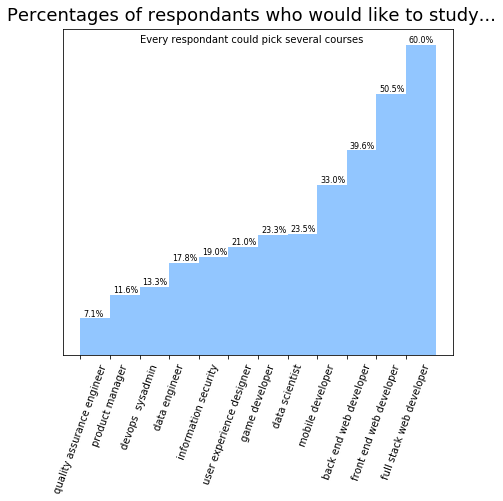

In [31]:
graph = pd.DataFrame([0,0,0,0,0,0,0,0,0,0,0,0])
graph["jobs"] = [x[1] for x in more_than_1]
graph["percentages"] =  [more_than_1[x] for x in more_than_1]
graph = graph[["jobs","percentages"]]
graph.sort_values(["percentages"],inplace = True)

w = 1
x_axis = np.arange(0, len(more_than_1.keys())*w, w) 

plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(figsize=(7, 6))
ax.bar(x_axis,graph['percentages'], width = w)
ax.set_xticks(x_axis-0.5)
ax.set_xticklabels(more_than_1.keys(), rotation=70)
ax.get_yaxis().set_visible(False)
plt.figtext(.5,.9,'Percentages of respondants who would like to study...', fontsize=18, ha='center')
plt.figtext(.5,.85,'Every respondant could pick several courses',fontsize=10,ha='center')
for i, v in enumerate(round(graph['percentages'],1)):
    plt.text(x_axis[i] - 0.4 , v + 0.5, str(v)+"%", size = 8 )
    

plt.show()

Our focus on web and mobile development courses as it is what our company is selling. We can see that those represent the top subjects people would like to learn, this sound promising. However as people could choose different topics, maybe the one who chose web development are the exact same that chose mobile development, which would reduce the total number of people interested. 

Let's see how many people are interested in at least one of these two subjects.

6992


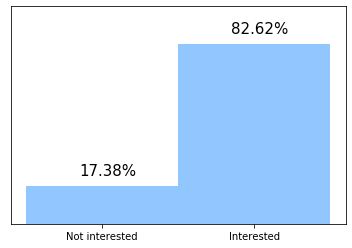

In [35]:
clean_jobs = survey17['JobRoleInterest'].dropna()

nr_of_mobile_web = 0

for liste in clean_jobs:
    for element in liste:
        if 'web developer' in element:
            nr_of_mobile_web += 1
            break


nr_of_respondant_to_jobrole = clean_jobs.count()
no_mobile_web = (nr_of_respondant_to_jobrole - nr_of_mobile_web)/nr_of_respondant_to_jobrole*100
nr_of_mobile_web = nr_of_mobile_web/nr_of_respondant_to_jobrole*100

y = [no_mobile_web ,nr_of_mobile_web]
x = ["Not interested","Interested"]

print(nr_of_respondant_to_jobrole)

pos = np.arange(len(y))
fig, ax = plt.bar(pos,y,width = 1)
plt.xticks(pos,x)
plt.ylim(0,100)
ax.axes.get_yaxis().set_visible(False)
for i,v in enumerate(y):
    plt.text( i-0.15,  v+ 5, str(round(v,2))+"%", size = 15 )


Out of the 38,47% who answered this question, more than 82% wished to learn Web or Mobile development. Due to the size of this sample, 6992 respondant, we can consider this information as valuable.

### Country ###

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

In order to do that we have the "CountryLive" column that can help us. If we remember our goal : we want to know where to advertize, in which two best countries for our courses.

We will only work with a shorter dataset with only people who answered about the role they would be interested in.



In [16]:
countries = survey17.copy()
countries.dropna(subset=['JobRoleInterest'],inplace  = True)


country_live = countries["CountryLive"].value_counts()
country_live_pct = round(countries["CountryLive"].value_counts(normalize = True)*100,2)

country = pd.DataFrame(data = {'country frequency' :country_live,'country percentage' : country_live_pct})
country.reset_index(inplace = True)
country.rename(columns = {'index': 'country'}, inplace = True)

print(country.info())
country.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 3 columns):
country               137 non-null object
country frequency     137 non-null int64
country percentage    137 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB
None


,country,country frequency,country percentage
0,United States of America,3125,45.70
1,India,528,7.72
2,United Kingdom,315,4.61
3,Canada,260,3.80
4,Poland,131,1.92


We only printed the top 5 countries but they are 137 of them represented!

Let's regroup all the "small" countries under the "Others" group and vizualise those data.


In [17]:
country.loc[country['country percentage'] < 1, 'country'] = "Others"
country.groupby("country").sum().sort_values("country frequency", ascending = False).reset_index()


,country,country frequency,country percentage
0,United States of America,3125,45.70
1,Others,1615,23.45
2,India,528,7.72
3,United Kingdom,315,4.61
4,Canada,260,3.80
5,Poland,131,1.92
6,Brazil,129,1.89
7,Germany,125,1.83
8,Australia,112,1.64
9,Russia,102,1.49
